In [ ]:
!pip install mmcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 593 kB 4.9 MB/s 
     |████████████████████████████████| 190 kB 65.7 MB/s 
  Created wheel for mmcv: filename=mmcv-1.7.0-py2.py3-none-any.whl size=914087 sha256=616bf5926ce0cb73b4023dee6e54aaded54b4a7b7160829439f01507d91814b6
  Stored in directory: /root/.cache/pip/wheels/9b/89/2b/4dd481113713f57069c98473061037314d4f80a66077a3b5ec
Successfully built mmcv


In [ ]:
! pip install facenet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 


In [42]:
import warnings
warnings.filterwarnings("ignore")
from facenet_pytorch import MTCNN
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [ ]:
!unzip Project\ _Deeplearning.zip

Archive:  Project _Deeplearning.zip
  inflating: Project _Deeplearning/s1.mp4  
  inflating: Project _Deeplearning/s10.mp4  
  inflating: Project _Deeplearning/s100.mp4  
  inflating: Project _Deeplearning/s11.mp4  
  inflating: Project _Deeplearning/s12.mp4  
  inflating: Project _Deeplearning/s13.mp4  
  inflating: Project _Deeplearning/s14.mp4  
  inflating: Project _Deeplearning/s15.mp4  
  inflating: Project _Deeplearning/s16.mp4  
  inflating: Project _Deeplearning/s17.mp4  
  inflating: Project _Deeplearning/s18.mp4  
  inflating: Project _Deeplearning/s19.mp4  
  inflating: Project _Deeplearning/s2.mp4  
  inflating: Project _Deeplearning/s20.mp4  
  inflating: Project _Deeplearning/s21.mp4  
  inflating: Project _Deeplearning/s22.mp4  
  inflating: Project _Deeplearning/s23.mp4  
  inflating: Project _Deeplearning/s24.mp4  
  inflating: Project _Deeplearning/s25.mp4  
  inflating: Project _Deeplearning/s26.mp4  
  inflating: Project _Deeplearning/s27.mp4  
  inflating: Project

In [ ]:

import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
import os,io
class FaceLandmarksDataset(Dataset):

    def __init__(self, csv_file):
        self.landmarks_frame = video = mmcv.VideoReader("/content/unh.mp4")
    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        #img_name = os.path.join(self.landmarks_frame.iloc[idx, 0])
        #image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        #sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
IMAGE_PATH = "/content/Project _Deeplearning"
BATCH_SIZE = 10

In [ ]:
train_loader = DataLoader(dataset=IMAGE_PATH, 
                         batch_size=BATCH_SIZE,
                         num_workers=2,
                         shuffle=False)

In [ ]:
est_loader = DataLoader(dataset=train_loader, 
                         batch_size=BATCH_SIZE,
                         num_workers=2,
                         shuffle=False)

In [ ]:
mtcnn = MTCNN(keep_all=True, device=device)

In [ ]:
f=glob.glob("/content/Project _Deeplearning")

In [ ]:
v=[]
for folder in f :
  for f1 in glob.glob(folder+'/*.mp4') :
    v.append(f1)
    print(f1)

/content/Project _Deeplearning/s47.mp4
/content/Project _Deeplearning/s30.mp4
/content/Project _Deeplearning/s97.mp4
/content/Project _Deeplearning/s81.mp4
/content/Project _Deeplearning/s2.mp4
/content/Project _Deeplearning/s26.mp4
/content/Project _Deeplearning/s48.mp4
/content/Project _Deeplearning/s67.mp4
/content/Project _Deeplearning/s78.mp4
/content/Project _Deeplearning/s23.mp4
/content/Project _Deeplearning/s64.mp4
/content/Project _Deeplearning/s62.mp4
/content/Project _Deeplearning/s17.mp4
/content/Project _Deeplearning/s25.mp4
/content/Project _Deeplearning/s32.mp4
/content/Project _Deeplearning/s90.mp4
/content/Project _Deeplearning/s68.mp4
/content/Project _Deeplearning/s29.mp4
/content/Project _Deeplearning/s96.mp4
/content/Project _Deeplearning/s100.mp4
/content/Project _Deeplearning/s16.mp4
/content/Project _Deeplearning/s42.mp4
/content/Project _Deeplearning/s95.mp4
/content/Project _Deeplearning/s88.mp4
/content/Project _Deeplearning/s3.mp4
/content/Project _Deeplear

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

batch_size = 10
learning_rate = 0.01
num_epochs = 20
num_classes=10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class ConvNeuralNet(nn.Module): 
    def __init__(self):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer5 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer6 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer7 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer8 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool4 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
     
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)

        out = self.conv_layer5(x)
        out = self.conv_layer6(out)
        out = self.max_pool3(out)
        
        out = self.conv_layer7(out)
        out = self.conv_layer8(out)
        out = self.max_pool4(out)


                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [ ]:
model = ConvNeuralNet()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.05, momentum = 0.9)  

total_step = len(train_loader)

In [ ]:
import torchvision.models as models
import torch.nn as nn
model = models.resnet18(pretrained=True)

num_features = model.fc.in_features
num_classes=model.fc.out_features
model.fc = nn.Linear(num_features,num_classes)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [34]:
class PyTorch_NN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PyTorch_NN, self).__init__()
        self.input_layer = nn.Linear(input_dim, 128)
        self.hidden_layer = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, output_dim)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        x = F.softmax(self.output_layer(x), dim=1)
        return x

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train_loader, num_classes, test_size=0.1, random_state=2)

In [ ]:
def convert_pixel_str_to_img(pixel_str):
  """Convert pixel string into PIL Image object"""
  pixel_arr = np.fromstring(pixel_str, dtype=int, sep=' ').reshape(48,48)
  img = Image.fromarray(pixel_arr).convert('RGB')
  return img

In [35]:
def get_accuracy(pred_arr,original_arr):
    pred_arr = pred_arr.detach().numpy()
    original_arr = original_arr.numpy()
    final_pred= []

    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0

    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)*100

def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs):
    train_loss=[]
    train_accuracy=[]
    test_accuracy=[]

    for epoch in range(num_epochs):

        #forward feed
        output_train = model(X_train)

        train_accuracy.append(get_accuracy(output_train, y_train))

        #calculate the loss
        loss = criterion(output_train, y_train)
        train_loss.append(loss.item())

        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #backward propagation: calculate gradients
        loss.backward()

        #update the weights
        optimizer.step()

        with torch.no_grad():
            output_test = model(X_test)
            test_accuracy.append(get_accuracy(output_test, y_test))

        if epoch % 1 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f},Accuracy: {sum(test_accuracy)/len(test_accuracy):.2f}")

    return train_loss, train_accuracy, test_accuracy

In [41]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

train_loss, test_accuracy = train_network(model=model, optimizer=optimizer, criterion=criterion, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_epochs=20)

Epoch 1/20, Loss: 1.1073,Accuracy: 76.67
Epoch 2/20, Loss: 1.0348,Accuracy: 76.67
Epoch 3/20, Loss: 0.9747,Accuracy: 76.67
Epoch 4/20, Loss: 0.9193,Accuracy: 76.67
Epoch 5/20, Loss: 0.8754,Accuracy: 76.00
Epoch 6/20, Loss: 0.8433,Accuracy: 75.56
Epoch 7/20, Loss: 0.8212,Accuracy: 75.24
Epoch 8/20, Loss: 0.8058,Accuracy: 75.42
Epoch 9/20, Loss: 0.7943,Accuracy: 75.93
Epoch 10/20, Loss: 0.7846,Accuracy: 77.00
Epoch 11/20, Loss: 0.7763,Accuracy: 77.58
Epoch 12/20, Loss: 0.7702,Accuracy: 78.06
Epoch 13/20, Loss: 0.7661,Accuracy: 78.72
Epoch 14/20, Loss: 0.7626,Accuracy: 79.29
Epoch 15/20, Loss: 0.7590,Accuracy: 79.78
Epoch 16/20, Loss: 0.7551,Accuracy: 80.21
Epoch 17/20, Loss: 0.7513,Accuracy: 80.59
Epoch 18/20, Loss: 0.7478,Accuracy: 80.93
Epoch 19/20, Loss: 0.7445,Accuracy: 81.23
Epoch 20/20, Loss: 0.7414,Accuracy: 81.50


In [ ]:
import torchvision as transforms 
import torch.nn.functional as F
def predict_emotion(img):
  mtcnn = MTCNN(keep_all=True)
  all_boxes = mtcnn.detect("/content/Project _Deeplearning/s1.mp4")
  good_boxes = []
  for index, proba in enumerate(all_boxes[1]):
    if(proba > 0.9):
      good_boxes.append(all_boxes[0][index])

  model.eval()
  for boxes in good_boxes:
    img_cropped = img.crop(boxes)

    transform = transforms.Compose([transforms.Resize((224,224),interpolation=Image.NEAREST),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

    img_tensor = transform(img_cropped)
    img_tensor = img_tensor.to(device)

    with torch.no_grad():
      output = F.softmax(model(img_tensor.view(-1, 3, 224, 224))).squeeze()
    prob_emotion = output[torch.argmax(output).item()].item()
    pred_emotion = class_names[torch.argmax(output)]

In [ ]:
from re import I
video = mmcv.VideoReader('/content/Project _Deeplearning/s2.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
display.Video("/content/Project _Deeplearning/s2.mp4", width=640)

In [ ]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
  
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes :
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')

Tracking frame: 604
Done


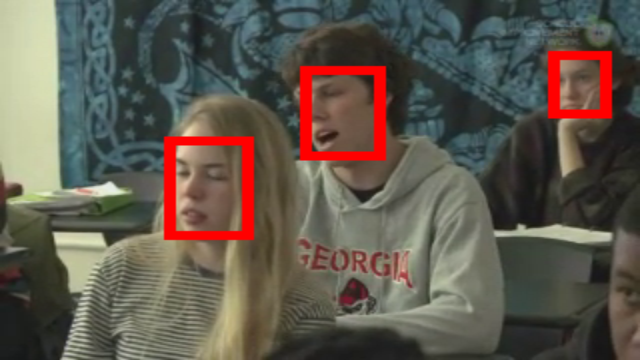

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass


In [ ]:
video = mmcv.VideoReader("/content/Project _Deeplearning/s4.mp4")
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video("/content/Project _Deeplearning/s4.mp4", width=640)

In [ ]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
  
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes :
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')

Tracking frame: 442
Done


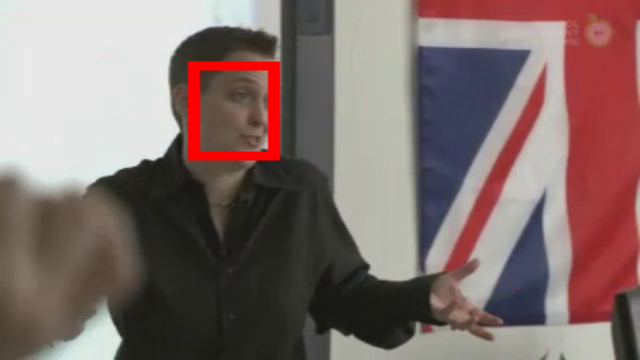

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass